In [1]:
import random
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import numpy as np
import scipy
from scipy import stats
import seaborn

In [2]:
data = pd.read_csv('trip.csv')

In [3]:
data.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
0,431,10/13/2014 10:31,10/13/2014 10:48,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960.0
1,432,10/13/2014 10:32,10/13/2014 10:48,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1970.0
2,433,10/13/2014 10:33,10/13/2014 10:48,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1988.0
3,434,10/13/2014 10:34,10/13/2014 10:48,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1977.0
4,435,10/13/2014 10:34,10/13/2014 10:49,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1971.0


In [4]:
len(data)

236065

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236065 entries, 0 to 236064
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   trip_id            236065 non-null  int64  
 1   starttime          236065 non-null  object 
 2   stoptime           236065 non-null  object 
 3   bikeid             236065 non-null  object 
 4   tripduration       236065 non-null  float64
 5   from_station_name  236065 non-null  object 
 6   to_station_name    236065 non-null  object 
 7   from_station_id    236065 non-null  object 
 8   to_station_id      236065 non-null  object 
 9   usertype           236065 non-null  object 
 10  gender             146171 non-null  object 
 11  birthyear          146167 non-null  float64
dtypes: float64(2), int64(1), object(9)
memory usage: 21.6+ MB


In [6]:
data = data.sort_values(by='starttime')
data.reset_index()

,index,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
0,20239,25091,1/1/2015 0:24,1/1/2015 0:48,SEA00325,1403.479,Lake Union Park / Valley St & Boren Ave N,12th Ave & E Mercer St,SLU-17,CH-15,Short-Term Pass Holder,NaN,NaN
1,20240,25092,1/1/2015 0:37,1/1/2015 0:44,SEA00267,459.469,Harvard Ave & E Pine St,Cal Anderson Park / 11th Ave & Pine St,CH-09,CH-08,Member,Male,1991.0
2,20241,25093,1/1/2015 0:44,1/1/2015 0:48,SEA00124,255.004,Harvard Ave & E Pine St,REI / Yale Ave N & John St,CH-09,SLU-01,Member,Male,1987.0
3,20259,25131,1/1/2015 10:14,1/1/2015 10:33,SEA00204,1145.254,Summit Ave E & E Republican St,Occidental Park / Occidental Ave S & S Washing...,CH-03,PS-04,Short-Term Pass Holder,NaN,NaN
4,20260,25132,1/1/2015 10:55,1/1/2015 11:03,SEA00391,470.801,E Pine St & 16th Ave,7th Ave & Union St,CH-07,CBD-03,Member,Male,1980.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
236060,128588,141669,9/9/2015 9:46,9/9/2015 9:54,SEA00460,473.064,E Pine St & 16th Ave,Terry Ave & Stewart St,CH-07,SLU-20,Member,Male,1978.0
236061,128589,141670,9/9/2015 9:49,9/9/2015 9:54,SEA00328,321.262,Pine St & 9th Ave,Republican St & Westlake Ave N,SLU-16,SLU-04,Member,Male,1983.0
236062,128590,141671,9/9/2015 9:49,9/9/2015 9:55,SEA00473,359.629,Westlake Ave & 6th Ave,9th Ave N & Mercer St,SLU-15,DPD-01,Member,Male,1970.0
236063,128591,141672,9/9/2015 9:55,9/9/2015 9:59,SEA00266,252.431,6th Ave & Blanchard St,Republican St & Westlake Ave N,BT-04,SLU-04,Member,Male,1988.0


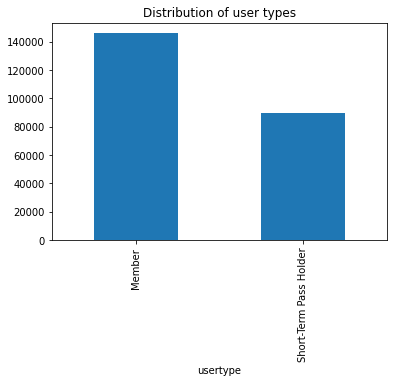

In [7]:
# Plotting the Distribution of User Types 
groupby_user = data.groupby('usertype').size()
groupby_user.plot.bar(title='Distribution of user types');

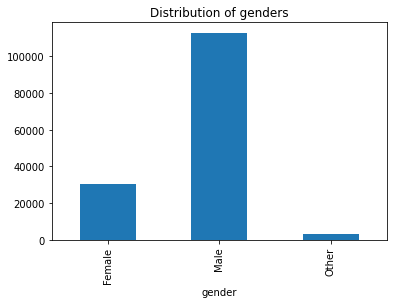

In [8]:
# Plotting the Distribution of Gender
groupby_gender = data.groupby('gender').size()
groupby_gender.plot.bar(title='Distribution of genders');

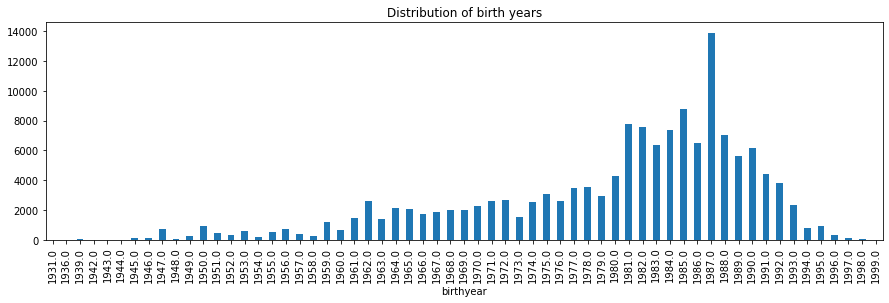

In [9]:
# Plotting the Distribution of Birth Years
data = data.sort_values(by='birthyear')
groupby_birthyear = data.groupby('birthyear').size()
groupby_birthyear.plot.bar(title='Distribution of birth years', figsize = (15,4));

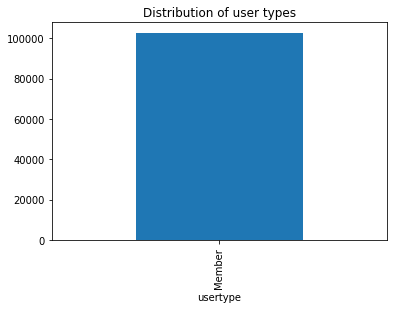

In [10]:
# Plotting the Frequency of Member Types for Millenials
data_mil = data[(data['birthyear'] >= 1977) & (data['birthyear'] <= 1994)]
groupby_mil = data_mil.groupby('usertype').size()
groupby_mil.plot.bar(title='Distribution of user types');

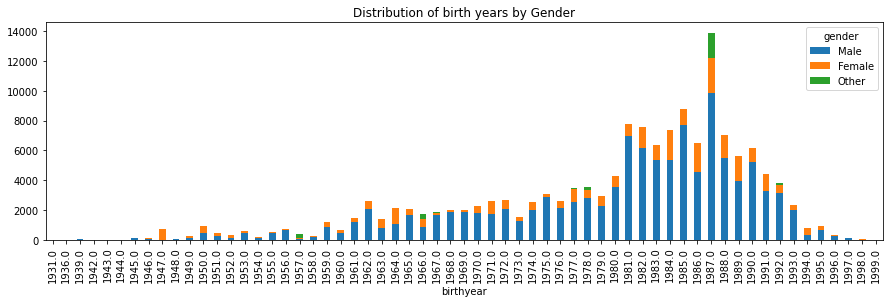

In [11]:
# Plotting the Distribution of Birth Years by Gender Type
groupby_birthyear_gender = data.groupby(['birthyear', 'gender'])['birthyear'].count().unstack('gender').fillna(0)
groupby_birthyear_gender[['Male','Female','Other']].plot.bar(title='Distribution of birth years by Gender', stacked=True, figsize = (15,4));

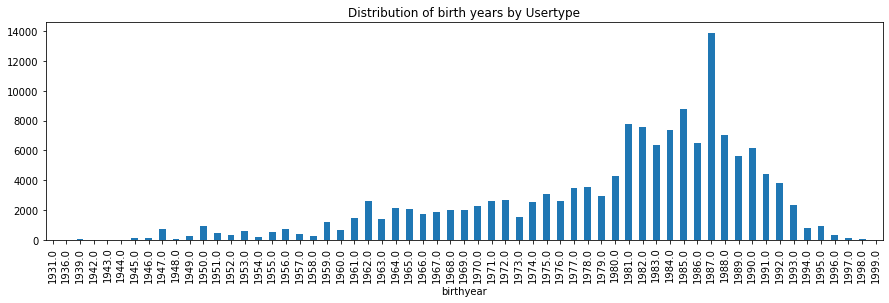

In [12]:
# Plotting the Distribution of Birth Years by User Types
groupby_birthyear_user = data.groupby(['birthyear', 'usertype'])['birthyear'].count().unstack('usertype').fillna(0)
groupby_birthyear_user['Member'].plot.bar(title='Distribution of birth years by Usertype', stacked=True, figsize = (15,4));

In [13]:
# Validation If We Don’t Have Birth Year Available for Short-Term Pass Holders
data[data['usertype']=='Short-Term Pass Holder']['birthyear'].isnull().values.all()

True

In [14]:
# Validation If We Don’t Have Gender Available for Short-Term Pass Holders
data[data['usertype']=='Short-Term Pass Holder']['gender'].isnull().values.all()

True

In [15]:
# Converting String to datetime, and Deriving New Features

List_ = list(data['starttime'])
List_ = [datetime.datetime.strptime(x, "%m/%d/%Y %H:%M") for x in List_]

data['starttime_mod'] = pd.Series(List_,index=data.index)
data['starttime_date'] = pd.Series([x.date() for x in List_], index=data.index)
data['starttime_year'] = pd.Series([x.year for x in List_], index=data.index)
data['starttime_month'] = pd.Series([x.month for x in List_], index=data.index)
data['starttime_day'] = pd.Series([x.day for x in List_], index=data.index)
data['starttime_hour'] = pd.Series([x.hour for x in List_], index=data.index)

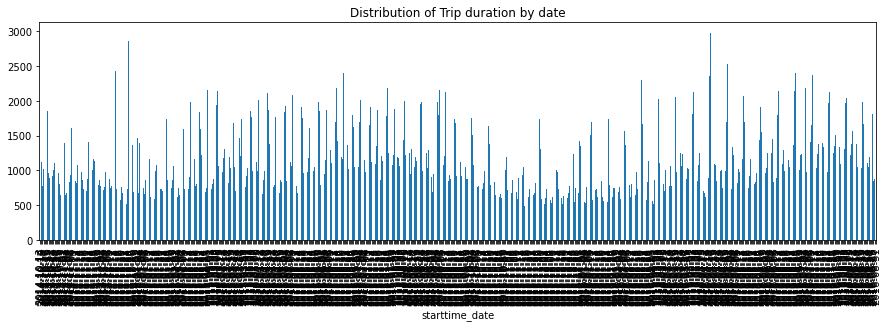

In [16]:
data.groupby('starttime_date')['tripduration'].mean().plot.bar(title = 'Distribution of Trip duration by date', figsize = (15,4));

In [17]:
# Determining the Measures of Center Using Statistics Package
trip_duration = list(data['tripduration'])
station_from = list(data['from_station_name'])
print('Mean of trip duration: %f' %statistics.mean(trip_duration))
print('Median of trip duration: %f' %statistics.median(trip_duration))
print('Mode of station originating from: %s' %statistics.mode(station_from))

Mean of trip duration: 1202.612210
Median of trip duration: 633.235000
Mode of station originating from: Pier 69 / Alaskan Way & Clay St


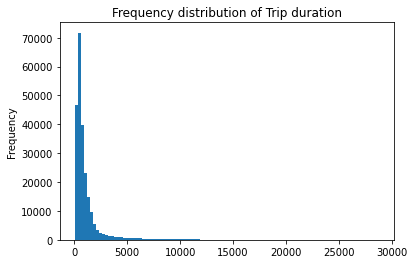

In [18]:
# Plotting Histogram of Trip Duration
data['tripduration'].plot.hist(bins=100, title='Frequency distribution of Trip duration')
plt.show()

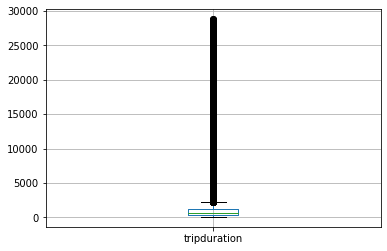

In [19]:
# Plotting a Box plot of Trip Duration
box = data.boxplot(column=['tripduration'])
plt.show()

In [20]:
# Determining Ratio of Values in Observations of tripduration Which Are Outliers
q75, q25 = np.percentile(trip_duration, [75 ,25])
iqr = q75 - q25
print('Proportion of values as outlier: %f percent' %
      ((len(data) - len([x for x in trip_duration if q75+(1.5*iqr) >=x>= q25-(1.5*iqr)]))*100/float(len(data)))
     )

Proportion of values as outlier: 9.548218 percent


In [21]:
# Calculating z scores for Observations Lying Within tripduration
mean_trip_duration = np.mean([x for x in trip_duration if q75+(1.5*iqr) >=x>= q25-(1.5*iqr)])
upper_whisker = q75+(1.5*iqr)
print('Mean of trip duration: %f' %mean_trip_duration)

Mean of trip duration: 711.726573


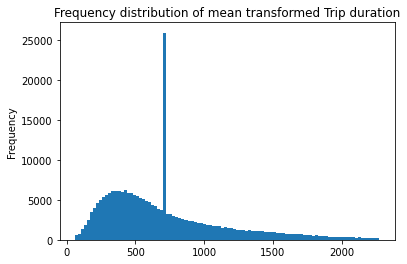

In [22]:
# Calculating Mean Scores for Observations Lying Within tripduration
def transform_tripduration(x):
    if x > upper_whisker:
        return mean_trip_duration
    return x

data['tripduration_mean'] = data['tripduration'].apply(lambda x: transform_tripduration(x))
data['tripduration_mean'].plot.hist(bins=100, title='Frequency distribution of mean transformed Trip duration')
plt.show()

In [23]:
# Deternining the Measures of Center in Absence of Outliers
print('Mean of trip duration: %f' %data['tripduration_mean'].mean())
print('Standard deviation of trip duration: %f' %data['tripduration_mean'].std())
print('Median of trip duration: %f' %data['tripduration_mean'].median())

Mean of trip duration: 711.726573
Standard deviation of trip duration: 435.517297
Median of trip duration: 633.235000


In [24]:
from datetime import date

def calculate_age(born):
    today = date.today()
    return today.year - born

data['age'] = data['birthyear'].apply(lambda x: calculate_age(x))

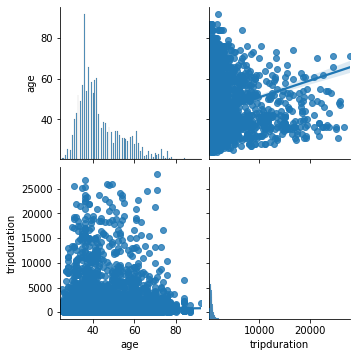

In [25]:
# Pairplot of trip duration and age
data = data.dropna()
seaborn.pairplot(data, vars=['age', 'tripduration'], kind='reg')
plt.show()

In [26]:
# Correlation Coefficient Between trip duration and age
pd.set_option('display.width', 100)
pd.set_option('precision', 3)

data['age'] = data['starttime_year'] - data['birthyear']

correlations = data[['tripduration', 'age']].corr(method='pearson')
print(correlations)

              tripduration    age
tripduration         1.000  0.058
age                  0.058  1.000


In [27]:
# Computing Two-Tail t-test of Categories of gender and user types
for cat in ['gender','usertype']:
    print('Category: %s\n' %cat)
    groupby_category = data.groupby(['starttime_date', cat])['starttime_date'].count().unstack(cat)
    groupby_category = groupby_category.dropna()
    category_names = list(groupby_category.columns)

    for comb in [(category_names[i],category_names[j]) for i in range(len(category_names)) for j in range(i+1, len(category_names))]:
        print('%s %s' %(comb[0], comb[1]))
        t_statistics = stats.ttest_ind(list(groupby_category[comb[0]]), list(groupby_category[comb[1]]))
        print('Statistic: %f, P value: %f' %(t_statistics.statistic, t_statistics.pvalue))
        print('\n')

Category: gender

Female Male
Statistic: -38.573753, P value: 0.000000


Female Other
Statistic: 48.234386, P value: 0.000000


Male Other
Statistic: 53.180282, P value: 0.000000


Category: usertype



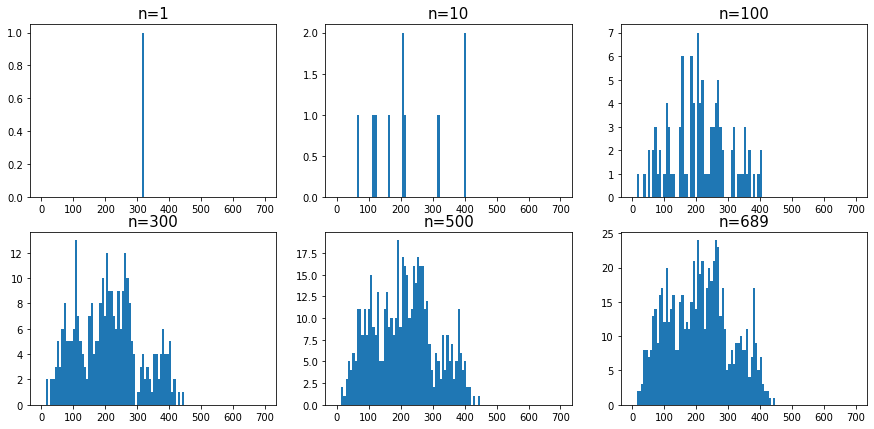

In [28]:
# Script to Validate Central Limit Theorem on Trips Dataset
daily_tickets = list(data.groupby('starttime_date').size())
sample_tickets = []
checkpoints = [1, 10, 100, 300, 500, 1000]
plot_count = 1

random.shuffle(daily_tickets)

plt.figure(figsize=(15,7))
binrange=np.array(np.linspace(0,700,101))

for i in range(1000):
    if daily_tickets:
        sample_tickets.append(daily_tickets.pop())

    if i+1 in checkpoints or not daily_tickets:
        plt.subplot(2,3,plot_count)
        plt.hist(sample_tickets, binrange)
        plt.title('n=%d' % (i+1),fontsize=15)        
        plot_count+=1

    if not daily_tickets:
        break

plt.show()